# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/22s_msai/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 12.0)
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})
from IPython.display import display
%matplotlib inline

import numpy as np
import pandas as pd
import warnings

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [3]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc, plot_confusion_matrix


In [4]:
# настройка отображений данных
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [5]:
column_names = [
  "COMPACTNESS",
  "CIRCULARITY",
  "DISTANCE CIRCULARITY",
  "RADIUS RATIO",
  "PRAXIS ASPECT RATIO",
  "MAXLENGTH ASPECT RATIO",
  "SCATTER RATIO",
  "ELONGATEDNESS",
  "PRAXIS RECTANGULARITY",
  "MAXLENGTH RECTANGULARITY",
  "SCALED VARIANCE ALONG MAJOR AXIS",
  "SCALED VARIANCE ALONG MINOR AXIS",
  "SCALED RADIUS OF GYRATION",
  "SKEWNESS ABOUT MAJOR AXIS",
  "SKEWNESS ABOUT MINOR AXIS",
  "KURTOSIS ABOUT MINOR AXIS",
  "KURTOSIS ABOUT MAJOR AXIS",
  "HOLLOWS RATIO",
  "CLASS LABEL"]
column_names = [word.lower() for word in column_names]
print(column_names)

['compactness', 'circularity', 'distance circularity', 'radius ratio', 'praxis aspect ratio', 'maxlength aspect ratio', 'scatter ratio', 'elongatedness', 'praxis rectangularity', 'maxlength rectangularity', 'scaled variance along major axis', 'scaled variance along minor axis', 'scaled radius of gyration', 'skewness about major axis', 'skewness about minor axis', 'kurtosis about minor axis', 'kurtosis about major axis', 'hollows ratio', 'class label']


In [6]:
df = pd.read_csv('car_data.csv', delimiter=',', names=column_names) #.values

In [7]:
display(df.sample(3))
display(df.describe())
display(df.info())
df.isna().sum()*100/len(df)

,compactness,circularity,distance circularity,radius ratio,praxis aspect ratio,maxlength aspect ratio,scatter ratio,elongatedness,praxis rectangularity,maxlength rectangularity,scaled variance along major axis,scaled variance along minor axis,scaled radius of gyration,skewness about major axis,skewness about minor axis,kurtosis about minor axis,kurtosis about major axis,hollows ratio,class label
768,91,46,101,199,65,9,196,34,23,146,219,574,199,73,5,8,186,194,opel
320,105,54,100,220,69,10,221,30,25,170,232,718,202,73,0,13,187,199,saab
832,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199,saab


,compactness,circularity,distance circularity,radius ratio,praxis aspect ratio,maxlength aspect ratio,scatter ratio,elongatedness,praxis rectangularity,maxlength rectangularity,scaled variance along major axis,scaled variance along minor axis,scaled radius of gyration,skewness about major axis,skewness about minor axis,kurtosis about minor axis,kurtosis about major axis,hollows ratio
count,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00
mean,93.68,44.86,82.09,168.94,61.69,8.57,168.84,40.93,20.58,148.00,188.63,439.91,174.70,72.46,6.38,12.60,188.93,195.63
std,8.23,6.17,15.77,33.47,7.89,4.60,33.24,7.81,2.59,14.52,31.39,176.69,32.55,7.49,4.92,8.93,6.16,7.44
min,73.00,33.00,40.00,104.00,47.00,2.00,112.00,26.00,17.00,118.00,130.00,184.00,109.00,59.00,0.00,0.00,176.00,181.00
25%,87.00,40.00,70.00,141.00,57.00,7.00,146.25,33.00,19.00,137.00,167.00,318.25,149.00,67.00,2.00,5.00,184.00,190.25
50%,93.00,44.00,80.00,167.00,61.00,8.00,157.00,43.00,20.00,146.00,178.50,364.00,173.00,71.50,6.00,11.00,188.00,197.00
75%,100.00,49.00,98.00,195.00,65.00,10.00,198.00,46.00,23.00,159.00,217.00,587.00,198.00,75.00,9.00,19.00,193.00,201.00
max,119.00,59.00,112.00,333.00,138.00,55.00,265.00,61.00,29.00,188.00,320.00,1018.00,268.00,135.00,22.00,41.00,206.00,211.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   compactness                       846 non-null    int64 
 1   circularity                       846 non-null    int64 
 2   distance circularity              846 non-null    int64 
 3   radius ratio                      846 non-null    int64 
 4   praxis aspect ratio               846 non-null    int64 
 5   maxlength aspect ratio            846 non-null    int64 
 6   scatter ratio                     846 non-null    int64 
 7   elongatedness                     846 non-null    int64 
 8   praxis rectangularity             846 non-null    int64 
 9   maxlength rectangularity          846 non-null    int64 
 10  scaled variance along major axis  846 non-null    int64 
 11  scaled variance along minor axis  846 non-null    int64 
 12  scaled radius of gyrat

None

compactness                        0.00
circularity                        0.00
distance circularity               0.00
radius ratio                       0.00
praxis aspect ratio                0.00
maxlength aspect ratio             0.00
scatter ratio                      0.00
elongatedness                      0.00
praxis rectangularity              0.00
maxlength rectangularity           0.00
scaled variance along major axis   0.00
scaled variance along minor axis   0.00
scaled radius of gyration          0.00
skewness about major axis          0.00
skewness about minor axis          0.00
kurtosis about minor axis          0.00
kurtosis about major axis          0.00
hollows ratio                      0.00
class label                        0.00
dtype: float64

In [8]:
df.duplicated().sum()

0

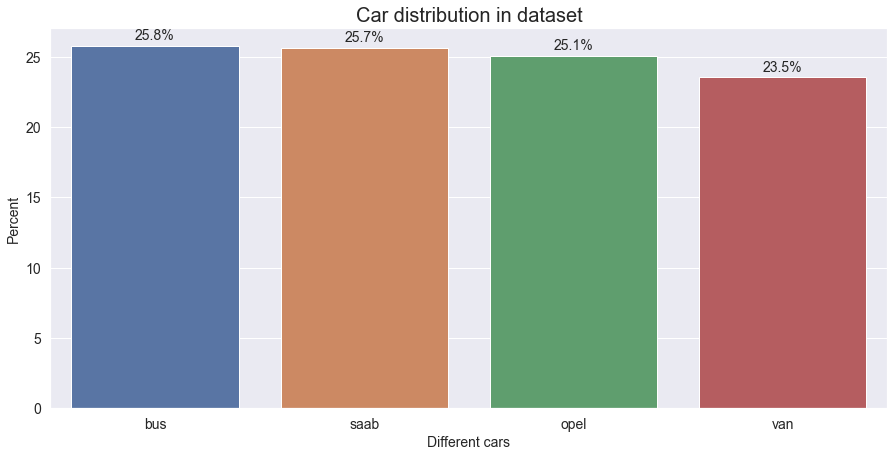

In [9]:
norm_target = (df['class label']
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points', 
                fontsize=14)

plt.title('Car distribution in dataset', fontsize=20)

plt.xlabel('Different cars', fontsize=14)
plt.ylabel('Percent', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

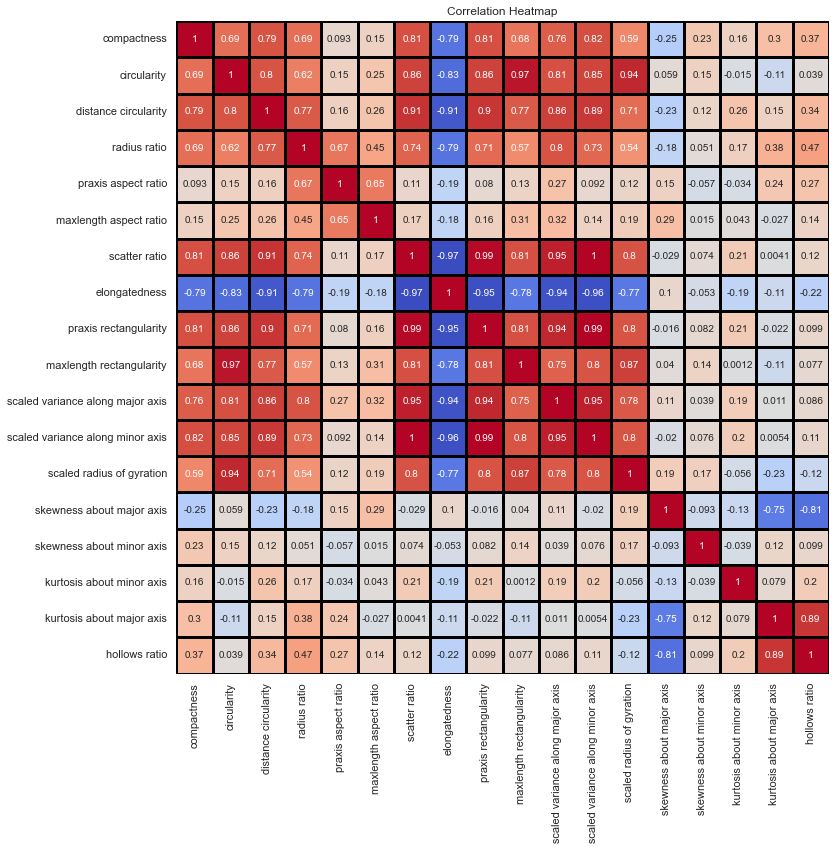

In [10]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm', linewidths=3,linecolor='black',square=True, cbar=False)
plt.title('Correlation Heatmap');

In [11]:
data = df.drop(['class label'], axis=1)
target = df['class label']
type(data)

pandas.core.frame.DataFrame

<Figure size 504x504 with 0 Axes>

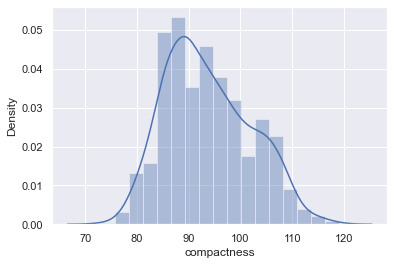

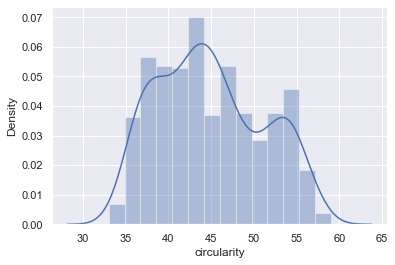

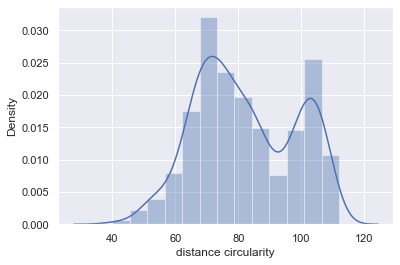

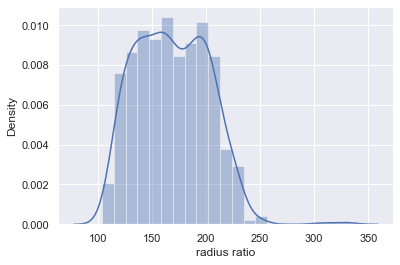

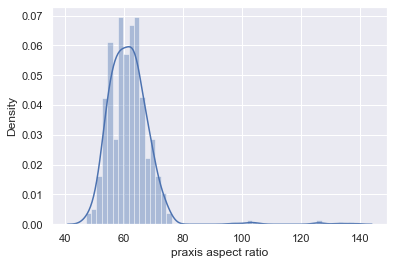

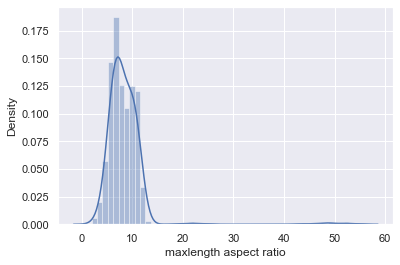

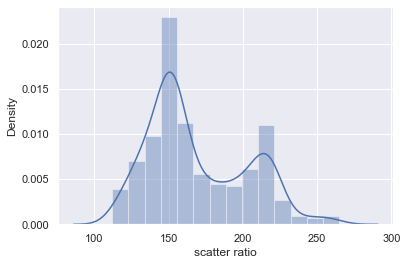

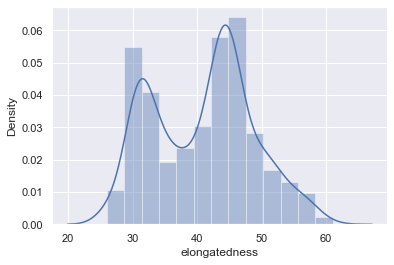

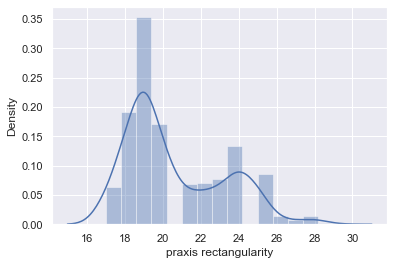

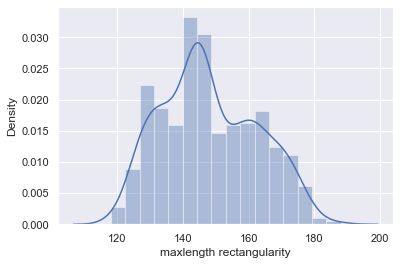

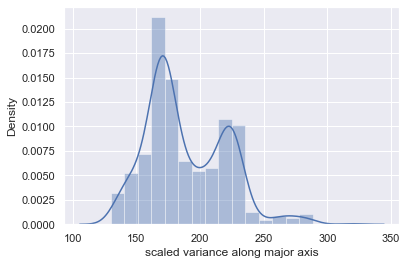

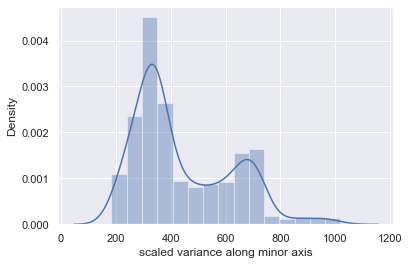

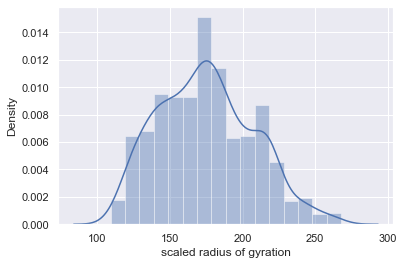

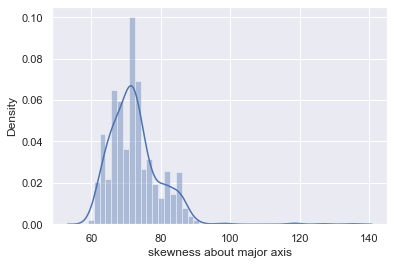

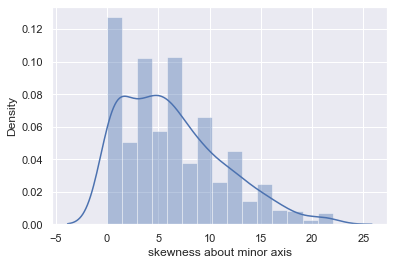

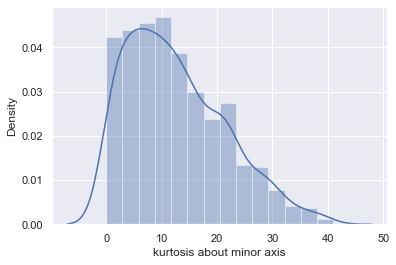

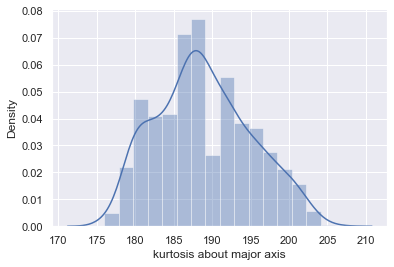

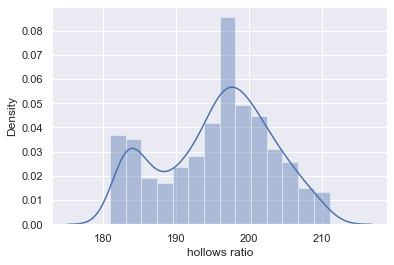

In [12]:
plt.figure(figsize = (7, 7))

for column in data.columns:
    plt.figure()             
    sns.distplot(df[column])

In [13]:
data = data.values
target = target.values

In [14]:
type(data), type(target)

(numpy.ndarray, numpy.ndarray)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


* There is a strong correlation in some data, and also not all data is distributed normally.To combat multicollinearity, I will use regularization

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)

[ 93.91256831  45.10746812  82.57377049 169.7723133   61.7996357
   8.71948998 169.56648452  40.78324226  20.63387978 148.67577413
 189.23315118 443.91256831 175.73588342  72.34972678   6.50273224
  12.41347905 189.04371585 195.84153005]


In [17]:
x_train_sc = scaler.transform(X_train)
x_test_sc = scaler.transform(X_test)

* Data normalization makes it possible to increase the stability of the model during training.
* I fit only on training data to reduce retraining.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [18]:
%%time 
lr = LogisticRegression(random_state=42, 
                        class_weight=None,
                        tol=1e-3, multi_class='multinomial',
                        solver='saga', max_iter = 500)
                                                                                
lr_params = {'penalty': ['l1', 'l2', 'elasticnet'],'C':np.linspace(5, 40, 10)}
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_search_lr_1 = GridSearchCV(lr, scoring='f1', param_grid = lr_params, cv = cv)
grid_search_lr_1.fit(x_train_sc, y_train)

CPU times: total: 12.1 s
Wall time: 12.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga',
                                          tol=0.001),
             param_grid={'C': array([ 5.        ,  8.88888889, 12.77777778, 16.66666667, 20.55555556,
       24.44444444, 28.33333333, 32.22222222, 36.11111111, 40.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1')

In [19]:
print('best params:', grid_search_lr_1.best_params_)
print('best_estimator:', grid_search_lr_1.best_estimator_)

best params: {'C': 5.0, 'penalty': 'l1'}
best_estimator: LogisticRegression(C=5.0, max_iter=500, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga', tol=0.001)


In [20]:
logreg_1 = grid_search_lr_1.best_estimator_

model_1 = logreg_1.fit(x_train_sc,y_train)
predicted_1 = model_1.predict(x_test_sc)
print(f'{classification_report(y_test, predicted_1)}')

accuracy_1 = round(accuracy_score(y_test, predicted_1),3) 
f1_1 = round(f1_score(y_test, predicted_1, average='macro'),3) 
print(f'accuracy on model_1 = {accuracy_1}')
print(f'f1 on model_1 = {f1_1}')

              precision    recall  f1-score   support

         bus       0.98      0.92      0.95        87
        opel       0.49      0.61      0.55        62
        saab       0.68      0.62      0.65        89
         van       0.96      0.93      0.95        59

    accuracy                           0.77       297
   macro avg       0.78      0.77      0.77       297
weighted avg       0.78      0.77      0.77       297

accuracy on model_1 = 0.768
f1 on model_1 = 0.772


In [21]:
import scikitplot as skplt

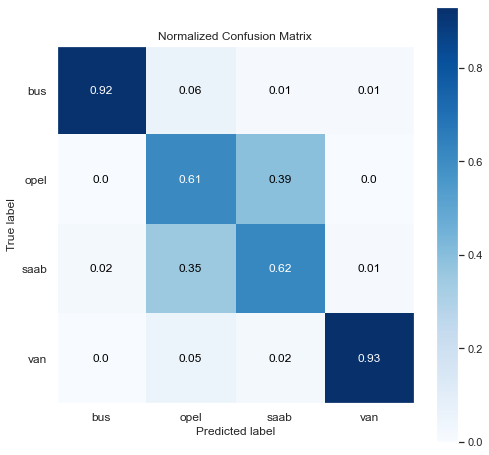

In [22]:
skplt.metrics.plot_confusion_matrix(y_test, predicted_1, normalize=True,
                                    figsize = (8,8),
                                    cmap='Blues', 
                                    title_fontsize='large', 
                                    text_fontsize='large')
plt.show()

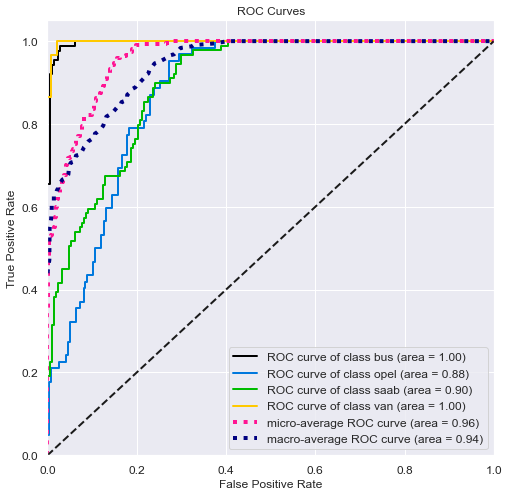

In [23]:
y_probas_1 = model_1.predict_proba(x_test_sc)
skplt.metrics.plot_roc(y_test, y_probas_1, 
                       figsize = (8,8),
                       #cmap='Blues', 
                       title_fontsize='large', 
                       text_fontsize='large')
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [24]:
from sklearn.decomposition import PCA

I apply PCA to the initial data, before normalization

In [25]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

exp_var_pca = pca.explained_variance_ratio_

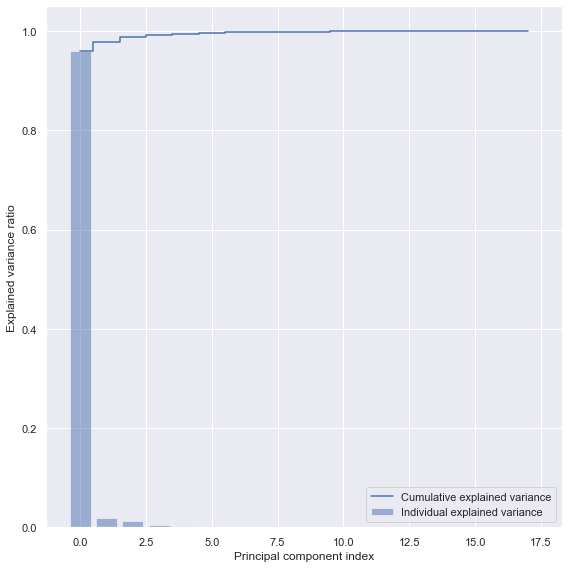

In [26]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize = (8, 8))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?
*  fit and transform methods to transform the train and test parts.

And now I apply it to the data after normalization

In [27]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_sc)

pca.n_components_

18

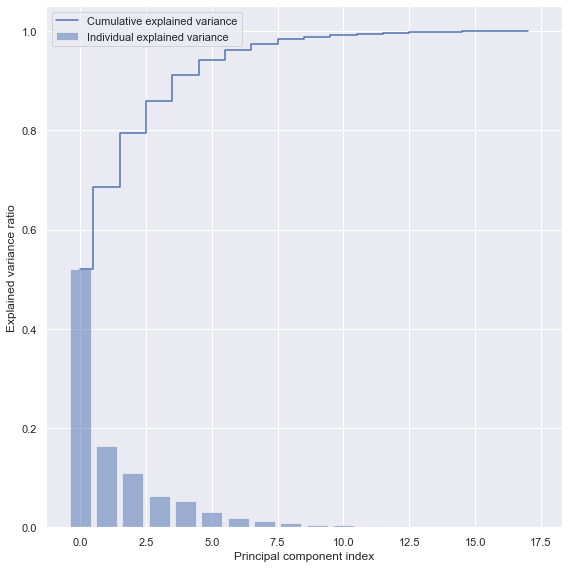

In [28]:
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize = (8, 8))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

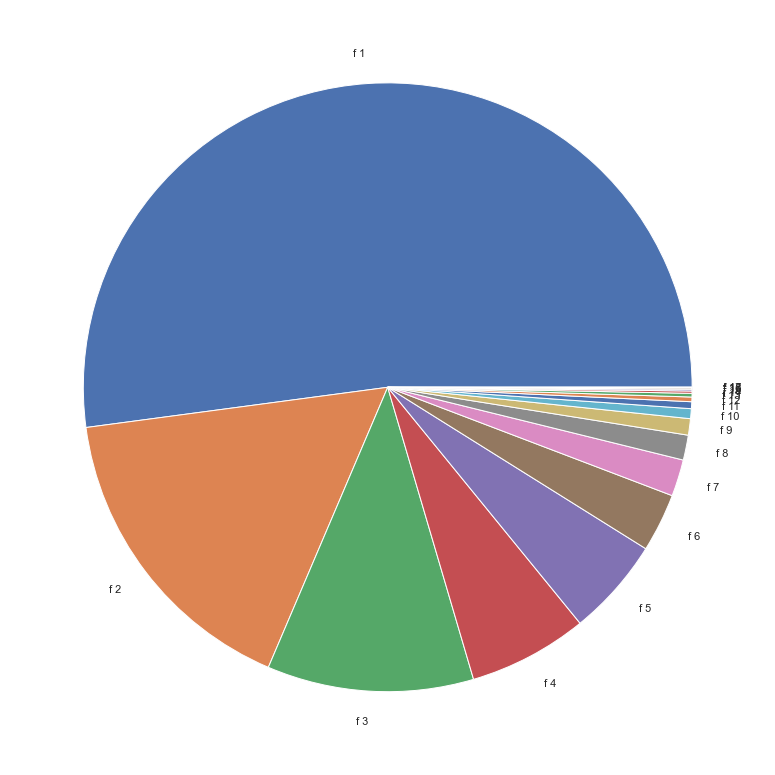

In [29]:
plt.figure(figsize = (14, 14))
_ = plt.pie(exp_var_pca, labels = ['f ' + str(i+1) for i in range(18)])

In [30]:
n_components = [i for i in range(1, 19)]
n_components

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [31]:
for i in n_components:
    pca = PCA(i)
    x_train_n_components = pca.fit_transform(x_train_sc)
    x_test_n_components = pca.transform(x_test_sc)
    logreg_n_components = grid_search_lr_1.best_estimator_
    model_n_components = logreg_n_components.fit(x_train_n_components,y_train)
    predicted_n_components = model_n_components.predict(x_test_n_components)
    print(f'accuracy for {i} components is {round(accuracy_score (y_test, predicted_n_components),3)}')

accuracy for 1 components is 0.286
accuracy for 2 components is 0.438
accuracy for 3 components is 0.407
accuracy for 4 components is 0.421
accuracy for 5 components is 0.444
accuracy for 6 components is 0.549
accuracy for 7 components is 0.646
accuracy for 8 components is 0.684
accuracy for 9 components is 0.69
accuracy for 10 components is 0.694
accuracy for 11 components is 0.731
accuracy for 12 components is 0.737
accuracy for 13 components is 0.741
accuracy for 14 components is 0.761
accuracy for 15 components is 0.774
accuracy for 16 components is 0.781
accuracy for 17 components is 0.771
accuracy for 18 components is 0.771


In [32]:
pca = PCA(16)
#pca.fit(x_train_sc)
x_train_pca = pca.fit_transform(x_train_sc)

x_test_pca = pca.transform(x_test_sc)

In [33]:
print(x_train_pca.shape, y_train.shape, x_test_pca.shape, y_test.shape)

(549, 16) (549,) (297, 16) (297,)


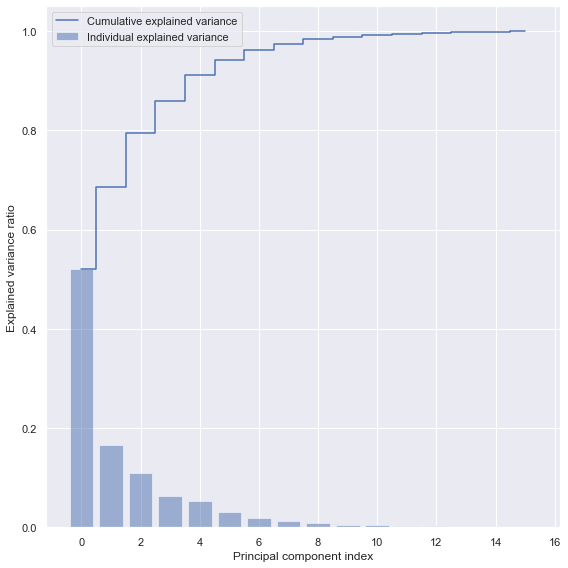

In [34]:
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize = (8, 8))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

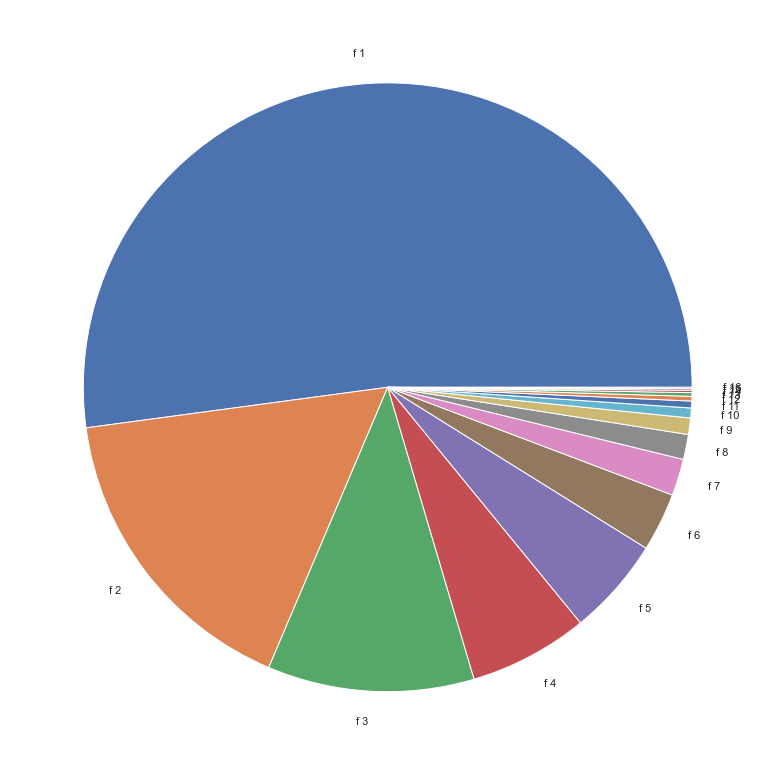

In [35]:
plt.figure(figsize = (14, 14))
_ = plt.pie(exp_var_pca, labels = ['f ' + str(i+1) for i in range(16)])

In [36]:
pca

PCA(n_components=16)

I choose the number of components is 16, because PCA with 16 components gives us the best result for accuracy

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
print(x_train_pca.shape, y_train.shape, x_test_pca.shape, y_test.shape)

(549, 16) (549,) (297, 16) (297,)


In [39]:
%%time 

pca = PCA(16)
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()


logistic = LogisticRegression(random_state=42, 
                              class_weight=None,
                              tol=1e-3, 
                              multi_class='multinomial',
                              penalty = 'l1',
                              solver='saga', max_iter = 500)

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [16],
    'logistic__C':np.linspace(5, 40, 10)
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_search_logistic = GridSearchCV(pipe, param_grid, scoring='f1', cv = cv)
model_pipe = grid_search_logistic.fit(X_train, y_train)

print(grid_search_logistic.best_params_)

{'logistic__C': 5.0, 'pca__n_components': 16}
CPU times: total: 6.92 s
Wall time: 6.92 s


In [40]:
model_pipe

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=16)),
                                       ('logistic',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           penalty='l1',
                                                           random_state=42,
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'logistic__C': array([ 5.        ,  8.88888889, 12.77777778, 16.66666667, 20.55555556,
       24.44444444, 28.33333333, 32.22222222, 36.11111111, 40.        ]),
                         'pca__n_components': [16]},
             scoring='f1')

In [41]:
predicted_2 = model_pipe.predict(X_test)
print(f'{classification_report(y_test, predicted_2)}')

accuracy_2 = round(accuracy_score(y_test, predicted_2),3) 
f1_2 = round(f1_score(y_test, predicted_2, average='macro'),3) 
print(f'accuracy on model_1 = {accuracy_2}')
print(f'f1 on model_1 = {f1_2}')


              precision    recall  f1-score   support

         bus       0.99      0.92      0.95        87
        opel       0.51      0.66      0.58        62
        saab       0.71      0.63      0.67        89
         van       0.96      0.93      0.95        59

    accuracy                           0.78       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.80      0.78      0.79       297

accuracy on model_1 = 0.781
f1 on model_1 = 0.786


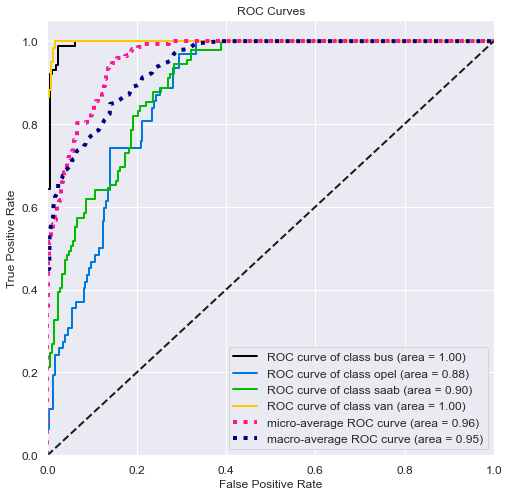

In [42]:
y_probas_pca = model_pipe.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_pca, 
                       figsize = (8,8),
                       #cmap='Blues', 
                       title_fontsize='large', 
                       text_fontsize='large')
plt.show()

In [43]:
print(x_train_pca.shape, y_train.shape, x_test_pca.shape, y_test.shape)

(549, 16) (549,) (297, 16) (297,)


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [44]:
from sklearn.tree import DecisionTreeClassifier


In [45]:
data = pd.DataFrame(data)
target = pd.DataFrame(target)


In [46]:
%%time 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


train_acc, test_acc, temp_train_acc, temp_test_acc  = [], [], [], []

max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for max_depth in max_depth_grid:
    dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(data, target):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train_, y_test_ = target.iloc[train_index], target.iloc[test_index]
        dtc.fit(X_train, y_train_)
        temp_train_acc.append(dtc.score(X_train, y_train_))
        temp_test_acc.append(dtc.score(X_test, y_test_))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))


Best accuracy on CV is 69.98% with 17 depth
CPU times: total: 422 ms
Wall time: 423 ms


Text(0.5, 0, 'Max_depth')

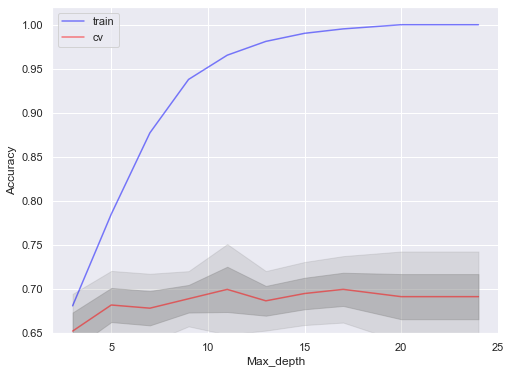

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.65,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

Optimal tree depth (max_depth) is 17

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [48]:
from sklearn.ensemble import BaggingClassifier
from tqdm.notebook import tqdm as tqdm_notebook

In [49]:
print(x_train_pca.shape, y_train.shape, x_test_pca.shape, y_test.shape)

(549, 16) (549,) (297, 16) (297,)


In [50]:
print(x_train_sc.shape, y_train.shape, x_test_sc.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


CPU times: total: 1.08 s
Wall time: 46.3 s


Text(0.5, 0, 'Size of ensemble')

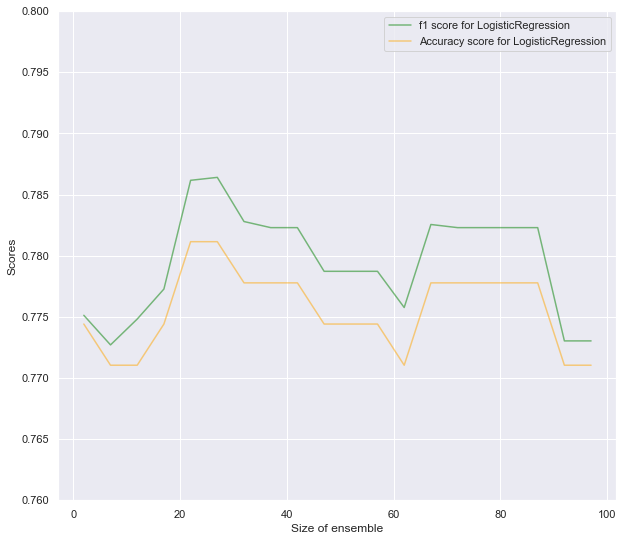

In [90]:
%%time 

accuracy_lr, f1_lr, step = [], [], []

pipeline = make_pipeline(LogisticRegression(C=5.0, max_iter=500, multi_class='multinomial', penalty='l1',
                          random_state=42, solver='saga', tol=0.001))

# Instantiate the bagging classifier
for size in range(2, 101, 5):
    bgclassifier_1 = BaggingClassifier(base_estimator=pipeline, 
                                       n_estimators= size,
                                       bootstrap=True,
                                       n_jobs=-1, 
                                       oob_score = True, 
                                       random_state = 90)
    bgclassifier_1.fit(x_train_pca, y_train)
    accuracy_ = accuracy_score(y_test, bgclassifier_1.predict(x_test_pca))
    accuracy_lr.append(accuracy_)
    f1_ = f1_score(y_test, bgclassifier_1.predict(x_test_pca), average='macro')
    f1_lr.append(f1_)  
    step.append(size)

fig, ax = plt.subplots(figsize=(10, 9))
ax.plot(step, f1_lr, alpha=0.5, color='green', label='f1 score for LogisticRegression')
ax.plot(step, accuracy_lr, alpha=0.5, color='orange', label='Accuracy score for LogisticRegression')

ax.legend(loc='best')
ax.set_ylim([0.76,0.8])
ax.set_ylabel("Scores")
ax.set_xlabel("Size of ensemble")      

CPU times: total: 1.22 s
Wall time: 6.37 s


Text(0.5, 0, 'Size of ensemble')

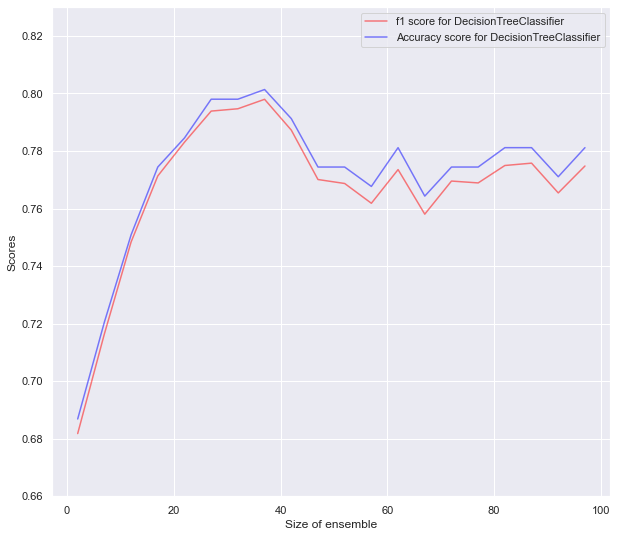

In [91]:
%%time

accuracy_dt, f1_dt, step_dt  = [], [], []

pipeline = make_pipeline(DecisionTreeClassifier(max_depth = 17, random_state=42))

# Instantiate the bagging classifier
for size in range(2, 101, 5):
    bgclassifier_1 = BaggingClassifier(base_estimator=pipeline, 
                                       n_estimators= size,
                                       bootstrap=True,
                                       n_jobs=-1, 
                                       oob_score = True, 
                                       random_state = 90)
    bgclassifier_1.fit(x_train_pca, y_train)
    accuracy_ = accuracy_score(y_test, bgclassifier_1.predict(x_test_pca))
    accuracy_dt.append(accuracy_)
    f1_ = f1_score(y_test, bgclassifier_1.predict(x_test_pca), average='macro')
    f1_dt.append(f1_)  
    step_dt.append(size)
    
fig, ax = plt.subplots(figsize=(10, 9))
ax.plot(step_dt, f1_dt, alpha=0.5, color='red', label='f1 score for DecisionTreeClassifier')
ax.plot(step_dt, accuracy_dt, alpha=0.5, color='blue', label='Accuracy score for DecisionTreeClassifier')

ax.legend(loc='best')
ax.set_ylim([0.66,0.83])
ax.set_ylabel("Scores")
ax.set_xlabel("Size of ensemble")    

Text(0.5, 1.0, 'Bagging ensebmle of LogisticRegression and DecisionTreeClassifier')

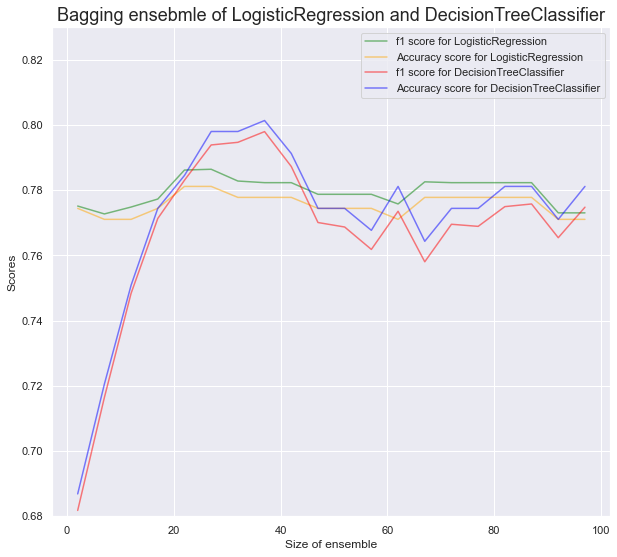

In [92]:
fig, ax = plt.subplots(figsize=(10, 9))
ax.plot(step_dt, f1_lr, alpha=0.5, color='green', label='f1 score for LogisticRegression')
ax.plot(step_dt, accuracy_lr, alpha=0.5, color='orange', label='Accuracy score for LogisticRegression')
ax.plot(step_dt, f1_dt, alpha=0.5, color='red', label='f1 score for DecisionTreeClassifier')
ax.plot(step_dt, accuracy_dt, alpha=0.5, color='blue', label='Accuracy score for DecisionTreeClassifier')

ax.legend(loc='best')
ax.set_ylim([0.68,0.83])
ax.set_ylabel("Scores")
ax.set_xlabel("Size of ensemble")
plt.title('Bagging ensebmle of LogisticRegression and DecisionTreeClassifier', fontsize=18)

* Bagging practically did not improve the score for logistic regression, but it greatly improved the result for the decision trees, everything according to theory)

* Yes, with this depth we reduce the bias, and by averaging predictions with bagging, we reduce the variance. Thus the accuracy of the model is improved

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [54]:
from sklearn.ensemble import RandomForestClassifier

CPU times: total: 18.8 s
Wall time: 13 s


Text(0.5, 0, 'Numbers of trees')

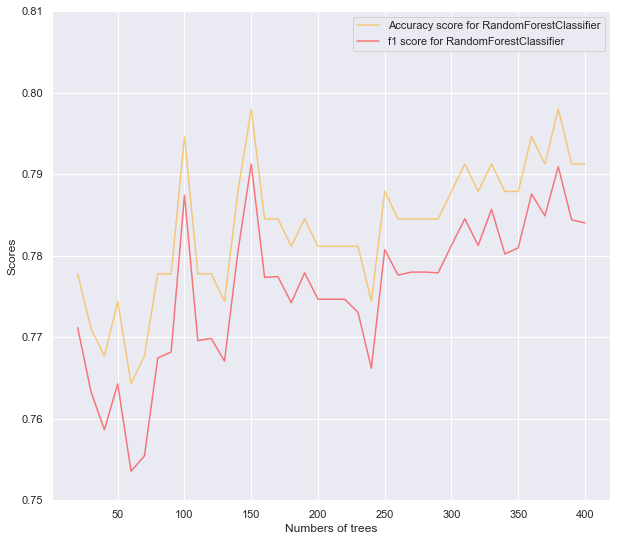

In [94]:
%%time

accuracy_rf, f1_rf, est_rf = [], [], []

for est in range(20, 401, 10):
    rf = RandomForestClassifier(random_state = 12345, 
                                n_estimators = est,
                                min_samples_split = 3,
                                min_samples_leaf = 3,
                                max_depth = 17,
                                n_jobs=-1)  

    rf.fit(x_train_pca, y_train)
    accuracy_ = accuracy_score(y_test, rf.predict(x_test_pca))
    accuracy_rf.append(accuracy_)
    f1_ = f1_score(y_test, rf.predict(x_test_pca), average='macro')
    f1_rf.append(f1_)  
    est_rf.append(est)
    
fig, ax = plt.subplots(figsize=(10, 9))
ax.plot(est_rf, accuracy_rf, alpha=0.5, color='orange', label='Accuracy score for RandomForestClassifier')
ax.plot(est_rf, f1_rf, alpha=0.5, color='red', label='f1 score for RandomForestClassifier')

ax.legend(loc='best')
ax.set_ylim([0.75,0.81])
ax.set_ylabel("Scores")
ax.set_xlabel("Numbers of trees")

* A random forest behaves similarly with a begin on crucial trees. In fact, it's the same thing, except for random division

#### 2.8. Gradient boosting
Now select the gradient boosting framework you prefer (LightGBM, XGBoost, CatBoost) and repeat the same experiments.

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal size of the you've got? Explain the results briefly.

In [56]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [57]:
y_train_le = LabelEncoder().fit_transform(y_train)
y_test_le = LabelEncoder().fit_transform(y_test)

In [95]:
%%time

accuracy_XGB, f1_XGB, est_XGB = [], [], []

for est in tqdm_notebook(range(20, 401, 20)):
    XGB = XGBClassifier(random_state = 12345, 
                             n_estimators = est,
                             max_depth = 17)  

    XGB.fit(x_train_pca, y_train_le)
    accuracy_ = accuracy_score(y_test_le, XGB.predict(x_test_pca))
    accuracy_XGB.append(accuracy_)
    f1_ = f1_score(y_test_le, XGB.predict(x_test_pca), average='macro')
    f1_XGB.append(f1_)  
    est_XGB.append(est)
    print(f'XGBClassifier with {est} trees has accuracy = {accuracy_:.3} and f1 = {f1_:.3}')

  0%|          | 0/20 [00:00<?, ?it/s]

XGBClassifier with 20 trees has accuracy = 0.741 and f1 = 0.739
XGBClassifier with 40 trees has accuracy = 0.754 and f1 = 0.752
XGBClassifier with 60 trees has accuracy = 0.747 and f1 = 0.746
XGBClassifier with 80 trees has accuracy = 0.754 and f1 = 0.754
XGBClassifier with 100 trees has accuracy = 0.764 and f1 = 0.762
XGBClassifier with 120 trees has accuracy = 0.771 and f1 = 0.769
XGBClassifier with 140 trees has accuracy = 0.774 and f1 = 0.773
XGBClassifier with 160 trees has accuracy = 0.774 and f1 = 0.773
XGBClassifier with 180 trees has accuracy = 0.774 and f1 = 0.774
XGBClassifier with 200 trees has accuracy = 0.771 and f1 = 0.771
XGBClassifier with 220 trees has accuracy = 0.771 and f1 = 0.771
XGBClassifier with 240 trees has accuracy = 0.768 and f1 = 0.768
XGBClassifier with 260 trees has accuracy = 0.768 and f1 = 0.768
XGBClassifier with 280 trees has accuracy = 0.771 and f1 = 0.772
XGBClassifier with 300 trees has accuracy = 0.771 and f1 = 0.772
XGBClassifier with 320 trees 

In [59]:
from catboost import CatBoostClassifier

In [77]:
%%time
# default params
default = CatBoostClassifier(random_seed=42, verbose=False)
default.fit(x_train_pca, y_train)
accuracy_default = accuracy_score(y_test, default.predict(x_test_pca))
f1_default = f1_score(y_test, default.predict(x_test_pca), average='macro')
print(f'Accuracy on default CatBoostClassifier = {accuracy_default}')
print(f'f1 on default CatBoostClassifier = {f1_default}')

Accuracy on default CatBoostClassifier = 0.8215488215488216
f1 on default CatBoostClassifier = 0.8203725544701552
CPU times: total: 29.1 s
Wall time: 10.7 s


In [78]:
%%time

accuracy_ctb, f1_ctb, est_ctb  = [], [], []

for est in range(20, 401, 20):
    ctb = CatBoostClassifier(random_state = 12345, 
                             num_trees = est,
                             max_depth = 5,
                             loss_function='MultiClass',
                             verbose = False)  

    ctb.fit(x_train_pca, y_train)
    accuracy_ = accuracy_score(y_test, ctb.predict(x_test_pca))
    accuracy_ctb.append(accuracy_)
    f1_ = f1_score(y_test, ctb.predict(x_test_pca), average='macro')
    f1_ctb.append(f1_)  
    est_ctb.append(est) 

CPU times: total: 1min 7s
Wall time: 19 s


Text(0.5, 1.0, 'The comparison of models depends of the numbers of trees')

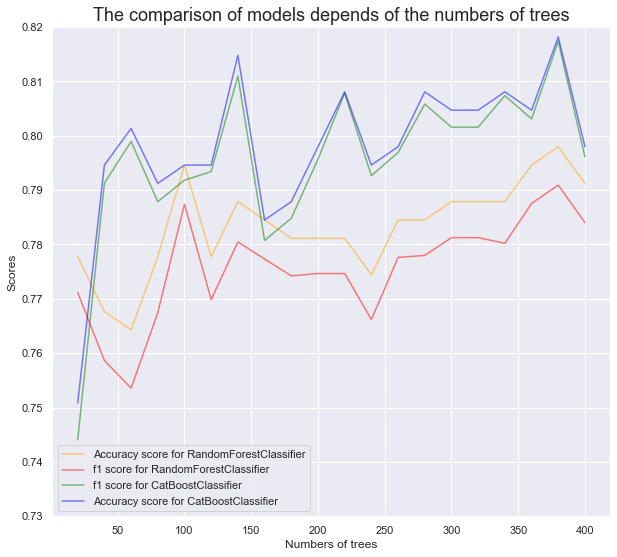

In [79]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.plot(est_rf, accuracy_rf, alpha=0.5, color='orange', label='Accuracy score for RandomForestClassifier')
ax.plot(est_rf, f1_rf, alpha=0.5, color='red', label='f1 score for RandomForestClassifier')

ax.plot(est_ctb, f1_ctb, alpha=0.5, color='green', label='f1 score for CatBoostClassifier')
ax.plot(est_ctb, accuracy_ctb, alpha=0.5, color='blue', label='Accuracy score for CatBoostClassifier')

ax.legend(loc='best')
ax.set_ylim([0.73,0.82])
ax.set_ylabel("Scores")
ax.set_xlabel("Numbers of trees")
plt.title('The comparison of models depends of the numbers of trees', fontsize=18)

* Gradient boosting is expected to show the best results from all models, and our native cut boost does it even on default parameters.

* I ran a grid search, it loaded the GPU for an hour, but I didn't see much big improvements

* Interestingly, XGBClassifier shows worse results than a random forest.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [80]:
accuracy_lr, f1_lr  = [], []

accuracy_dt, f1_dt  = [], []

accuracy_rf, f1_rf = [], []

N = len(x_train_pca) // 10

SIZE = [i for i in range (1, 11)]

model_1 = LogisticRegression(C=5.0, 
                             max_iter=500,
                             multi_class='multinomial', 
                             penalty='l1',
                             random_state=7576, 
                             solver='saga',
                             tol=0.001)


model_2 = DecisionTreeClassifier(max_depth = 17, random_state=42)

model_3 = RandomForestClassifier(random_state = 12345, 
                                 n_estimators = 160,
                                 min_samples_split = 3,
                                 min_samples_leaf = 3,
                                 max_depth = 17,
                                 n_jobs=-1)


for step in range(N, len(x_train_pca) + 1, N):
        model_1.fit(x_train_pca[:step], y_train[:step])
        accuracy_1 = accuracy_score(y_test, model_1.predict(x_test_pca))
        accuracy_lr.append(accuracy_1)
        f1_1 = f1_score(y_test, model_1.predict(x_test_pca), average='macro')
        f1_lr.append(f1_1)
        
        model_2.fit(x_train_pca[:step], y_train[:step])
        accuracy_2 = accuracy_score(y_test, model_2.predict(x_test_pca))
        accuracy_dt.append(accuracy_2)
        f1_2 = f1_score(y_test, model_2.predict(x_test_pca), average='macro')
        f1_dt.append(f1_2)
        
        
        model_3.fit(x_train_pca[:step], y_train[:step])
        accuracy_3 = accuracy_score(y_test, model_3.predict(x_test_pca))
        accuracy_rf.append(accuracy_3)
        f1_3 = f1_score(y_test, model_3.predict(x_test_pca), average='macro')
        f1_rf.append(f1_3)

Text(0.5, 1.0, 'The comparison of models depends on the size of the training sample')

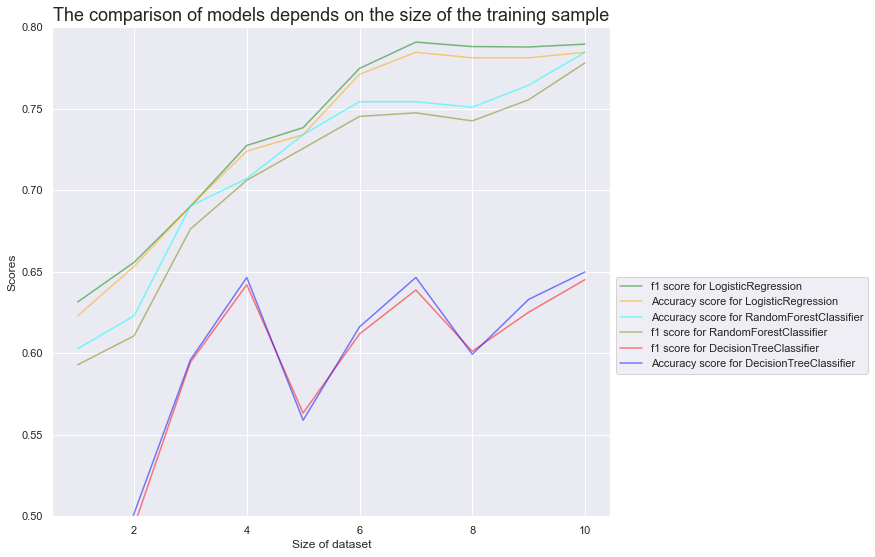

In [82]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.plot(SIZE, f1_lr, alpha=0.5, color='green', label='f1 score for LogisticRegression')
ax.plot(SIZE, accuracy_lr, alpha=0.5, color='orange', label='Accuracy score for LogisticRegression')

ax.plot(SIZE, accuracy_rf, alpha=0.5, color='cyan', label='Accuracy score for RandomForestClassifier')
ax.plot(SIZE, f1_rf, alpha=0.5, color='olive', label='f1 score for RandomForestClassifier')

ax.plot(SIZE, f1_dt, alpha=0.5, color='red', label='f1 score for DecisionTreeClassifier')
ax.plot(SIZE, accuracy_dt, alpha=0.5, color='blue', label='Accuracy score for DecisionTreeClassifier')


ax.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
ax.set_ylim([0.50,0.8])
ax.set_ylabel("Scores")
ax.set_xlabel("Size of dataset")
plt.title('The comparison of models depends on the size of the training sample', fontsize=18)

* The graph shows that different models need different amounts of data to get the best quality. Let's say  for LogisticRegression and DecisionTreeClassifier two-thirds of the data is enough for and for RandomForestClassifier they need more to reduce the bias.

* I think, depending on the algorithm used, the largest sample is not always needed for better learning.